# Import Necessary Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil
import random
import os

In [2]:
# Define the source data path
path = "Data"

# Define the destination folder for test data
destination_folder = "Test Data"

# List all subfolders in the source data path
lst_dir = os.listdir(path)

In [3]:
# Iterate through each subfolder in the source data path
for sub_folder in lst_dir:
    # Create the full path to the subfolder in the source data
    s_folder_join = os.path.join("Data", sub_folder)

    # List all files (images) in the subfolder
    sub_folder_lst = os.listdir(s_folder_join)

    # Randomly select an image from the subfolder
    img = random.choice(sub_folder_lst)

    # Create the full path to the selected image
    img_dir = os.path.join(s_folder_join, img)

    # Copy the selected image to the destination folder
    shutil.copy(img_dir, destination_folder)

    # Print a message indicating the copied image
    print(f"{img} is Completely Copied to --> {img_dir}")

frame_03_01_0144.png is Completely Copied to --> Data\01_palm\frame_03_01_0144.png
frame_02_02_0191.png is Completely Copied to --> Data\02_l\frame_02_02_0191.png
frame_00_03_0144.png is Completely Copied to --> Data\03_fist\frame_00_03_0144.png
frame_01_04_0108.png is Completely Copied to --> Data\04_fist_moved\frame_01_04_0108.png
frame_03_05_0107.png is Completely Copied to --> Data\05_thumb\frame_03_05_0107.png
frame_07_06_0121.png is Completely Copied to --> Data\06_index\frame_07_06_0121.png
frame_01_07_0031.png is Completely Copied to --> Data\07_ok\frame_01_07_0031.png
frame_03_08_0093.png is Completely Copied to --> Data\08_palm_moved\frame_03_08_0093.png
frame_06_09_0009.png is Completely Copied to --> Data\09_c\frame_06_09_0009.png
frame_04_10_0045.png is Completely Copied to --> Data\10_down\frame_04_10_0045.png


## Load the pre-trained image classification model

In [4]:
model = tf.keras.models.load_model("image_cls.h5")

In [5]:
model.summary() # Display a summary of the loaded model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

## List all files (images) in the destination folder (test data)

In [6]:
test_file = os.listdir("Test Data")

# Define image dimensions
img_height = 150
img_width = 150

In [7]:
# List class names based on the subfolders in the source data path
class_name = os.listdir("Data")
class_name

['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

1/1 [==============================] - 0s 313ms/step


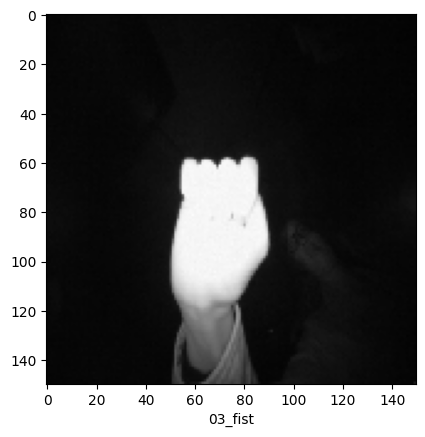

This image most likely belongs to 03_fist with a 100.00 percent confidence.
1/1 [==============================] - 0s 29ms/step


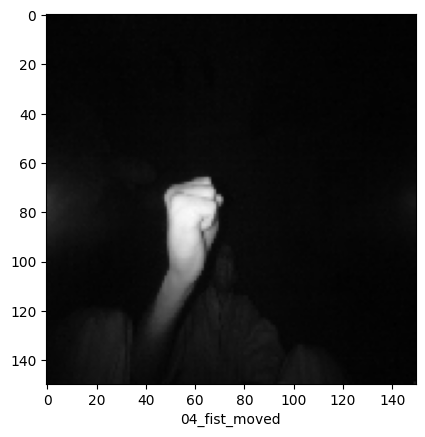

This image most likely belongs to 04_fist_moved with a 100.00 percent confidence.
1/1 [==============================] - 0s 29ms/step


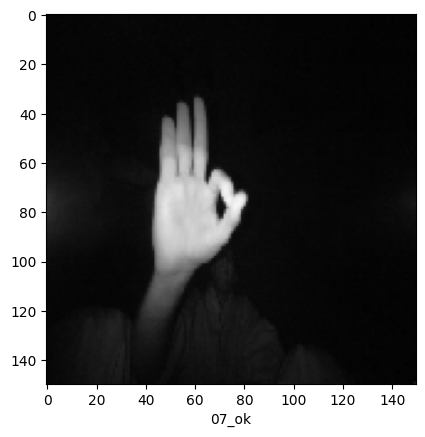

This image most likely belongs to 07_ok with a 100.00 percent confidence.
1/1 [==============================] - 0s 31ms/step


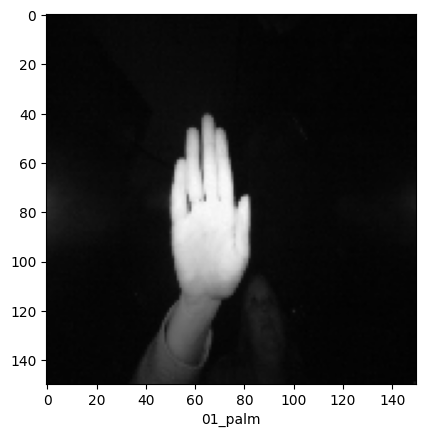

This image most likely belongs to 01_palm with a 100.00 percent confidence.
1/1 [==============================] - 0s 34ms/step


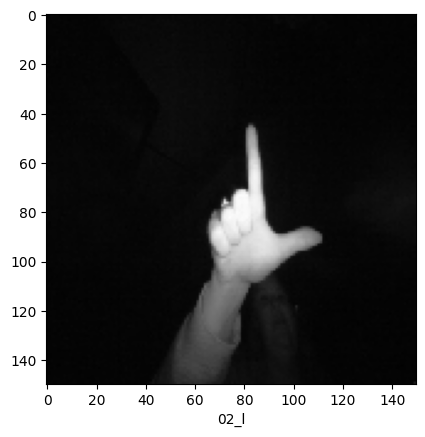

This image most likely belongs to 02_l with a 100.00 percent confidence.
1/1 [==============================] - 0s 27ms/step


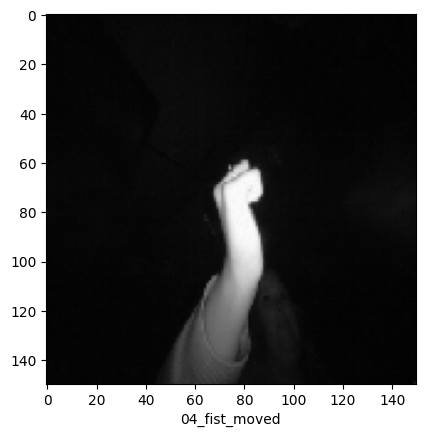

This image most likely belongs to 04_fist_moved with a 100.00 percent confidence.
1/1 [==============================] - 0s 26ms/step


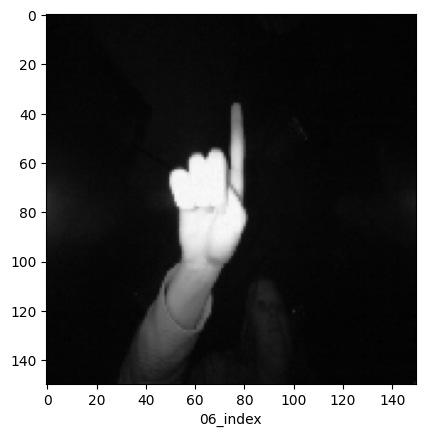

This image most likely belongs to 06_index with a 100.00 percent confidence.
1/1 [==============================] - 0s 27ms/step


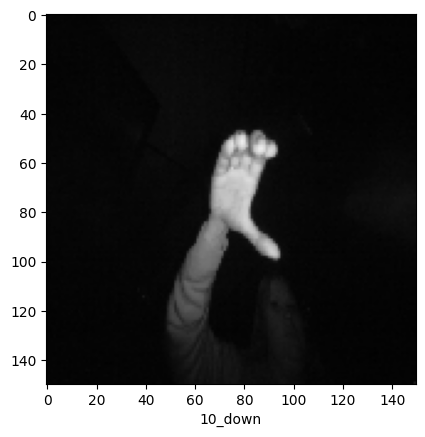

This image most likely belongs to 10_down with a 100.00 percent confidence.
1/1 [==============================] - 0s 33ms/step


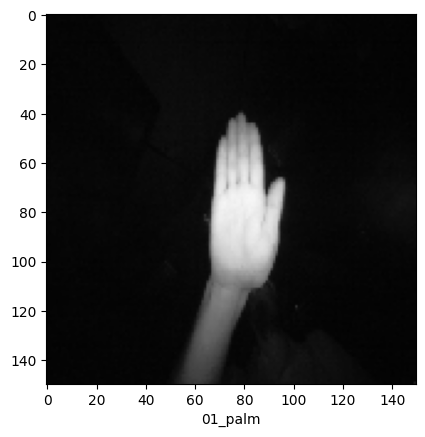

This image most likely belongs to 01_palm with a 100.00 percent confidence.
1/1 [==============================] - 0s 28ms/step


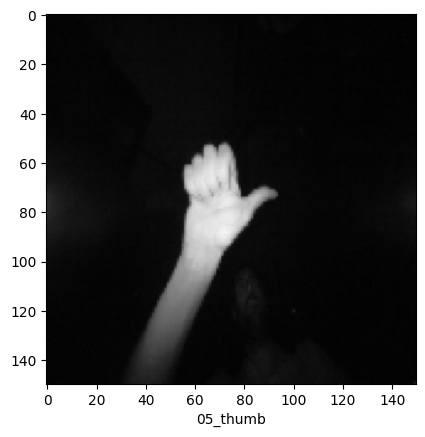

This image most likely belongs to 05_thumb with a 100.00 percent confidence.
1/1 [==============================] - 0s 33ms/step


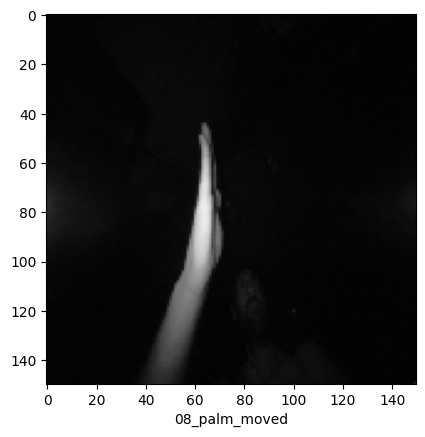

This image most likely belongs to 08_palm_moved with a 100.00 percent confidence.
1/1 [==============================] - 0s 30ms/step


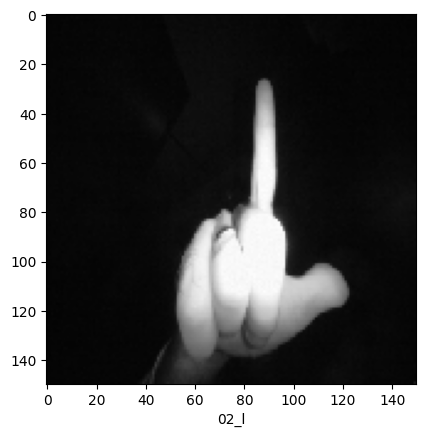

This image most likely belongs to 02_l with a 100.00 percent confidence.
1/1 [==============================] - 0s 27ms/step


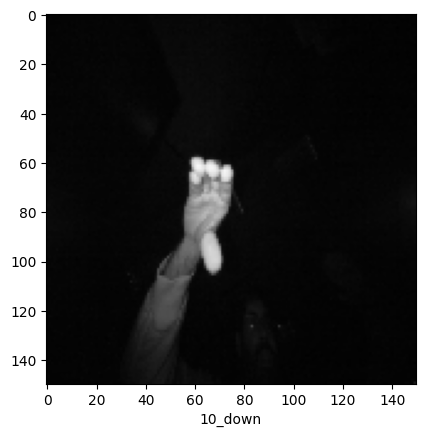

This image most likely belongs to 10_down with a 100.00 percent confidence.
1/1 [==============================] - 0s 30ms/step


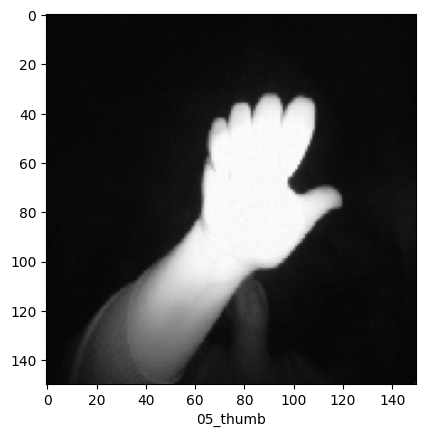

This image most likely belongs to 05_thumb with a 100.00 percent confidence.
1/1 [==============================] - 0s 28ms/step


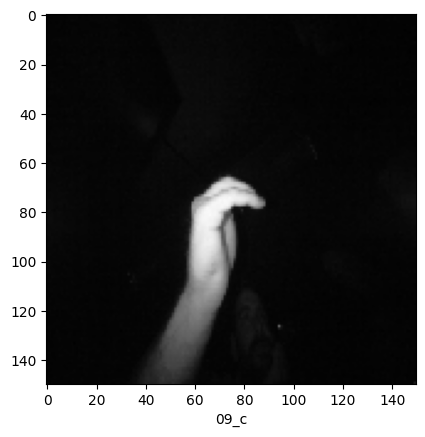

This image most likely belongs to 09_c with a 100.00 percent confidence.
1/1 [==============================] - 0s 34ms/step


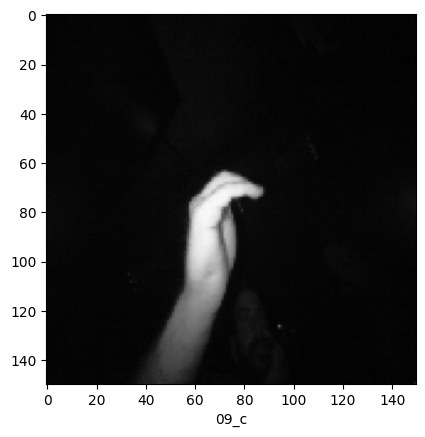

This image most likely belongs to 09_c with a 100.00 percent confidence.
1/1 [==============================] - 0s 31ms/step


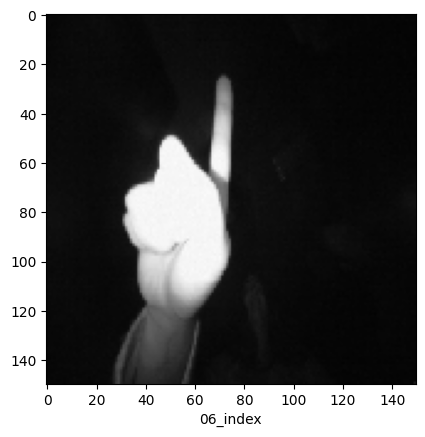

This image most likely belongs to 06_index with a 100.00 percent confidence.
1/1 [==============================] - 0s 27ms/step


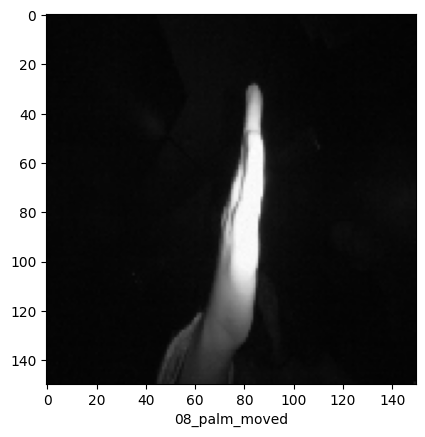

This image most likely belongs to 08_palm_moved with a 100.00 percent confidence.
1/1 [==============================] - 0s 32ms/step


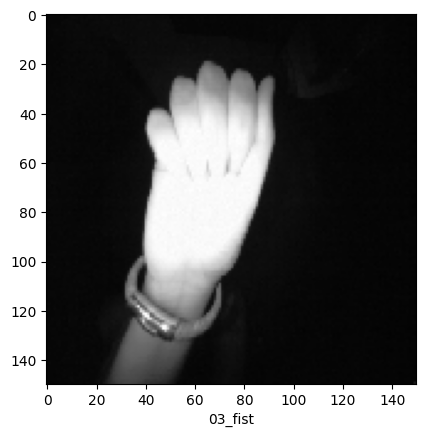

This image most likely belongs to 03_fist with a 100.00 percent confidence.
1/1 [==============================] - 0s 25ms/step


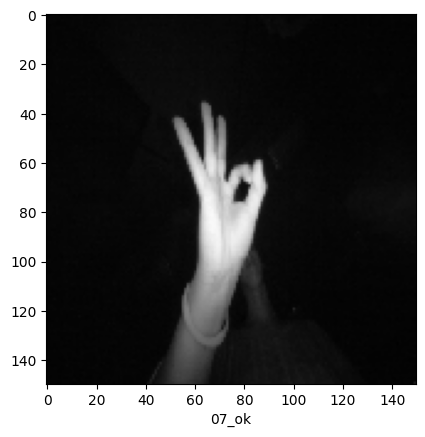

This image most likely belongs to 07_ok with a 100.00 percent confidence.


In [9]:
# Import NumPy library
import numpy as np

# Iterate through each image in the test data folder
for img in test_file:
    # Create the full path to the image in the destination folder
    img_dir = os.path.join(destination_folder, img)

    # Load and preprocess the image
    img = tf.keras.utils.load_img(
        img_dir, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Make predictions using the loaded model
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Display the image and its predicted class
    plt.imshow(img)
    plt.xlabel(class_name[np.argmax(score)])
    plt.show()

    # Print the predicted class and confidence level
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_name[np.argmax(score)], 100 * np.max(score))
    )